# QSAR Model Building of P53 Inhibitors

# Read in data

In [1]:
import pandas as pd

In [2]:
dataset_url = 'p53_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.856985
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.522879
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.943095
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.353596
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.187087
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.823909
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.028260
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.119186
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.823909


In [3]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = dataset.iloc[:,-1]
Y

0     5.856985
1     5.522879
2     4.943095
3     4.353596
4     5.187087
5     4.823909
6     5.028260
7     6.000000
8     6.119186
9     5.823909
10    5.259637
11    5.795880
12    5.508638
13    5.366532
14    4.970616
15    4.463442
16    5.000000
17    5.301030
18    5.207608
19    5.207608
20    5.823909
21    5.522879
22    5.522879
Name: pIC50, dtype: float64

# Remove low variance features

In [5]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP3,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP37,PubchemFP38,PubchemFP43,PubchemFP44,...,PubchemFP756,PubchemFP777,PubchemFP779,PubchemFP780,PubchemFP781,PubchemFP797,PubchemFP798,PubchemFP801,PubchemFP803,PubchemFP819
0,0,1,1,0,0,0,0,0,1,1,...,1,1,0,0,1,1,0,0,0,1
1,0,1,1,1,1,0,1,1,0,0,...,1,1,0,1,0,0,0,0,1,1
2,0,1,1,0,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
3,0,1,1,0,0,1,0,0,1,1,...,1,1,0,0,1,1,0,0,0,1
4,0,1,1,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,1,1
5,0,1,1,0,0,0,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
6,0,1,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
7,1,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
8,0,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
9,0,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [6]:
X.to_csv('descriptor_list.csv', index = False)

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8369515164561516

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([5.43827272, 5.46477202, 4.89880485, 4.79798839, 5.2507885 ,
       4.97877906, 5.0323368 , 5.79851812, 5.97324112, 5.81225603,
       5.28099199, 5.76047016, 5.42084419, 5.29121216, 5.15133273,
       4.75583125, 5.19786842, 5.21026119, 5.25137248, 5.28449537,
       5.54168505, 5.50766715, 5.35295888])

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.03
Coefficient of determination (R^2): 0.84


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

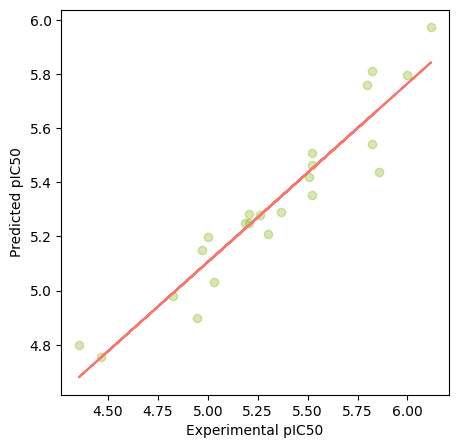

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [15]:
pickle.dump(model, open('p53_model.pkl', 'wb'))